In [5]:
from __future__ import division, print_function
from matplotlib import pyplot as plt
from math import log, e
from scipy.stats import entropy
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt


from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier

In [21]:
df_weatherAUS = pd.read_csv('data set/weatherAUS.csv')
df_weatherAUS.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [22]:
df_weatherAUS  = df_weatherAUS.drop(['Date','Location','Evaporation','Sunshine', 'Cloud9am','Cloud3pm',
                           'WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am',
                           'WindSpeed3pm'], axis=1)

In [23]:
y =  weatherAUS.RainTomorrow
data = weatherAUS.drop(['RainTomorrow'], axis=1)

Not Rain :  31877
Rain:  110316


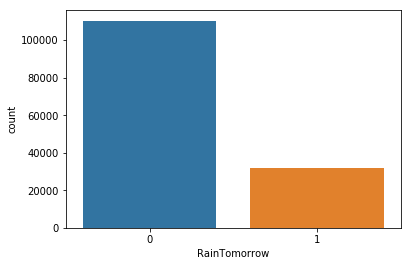

In [36]:
plot_sb = sb.countplot(y, label='Total')
Rain, NotRain = y.value_counts()
print('Not Rain : ',NotRain)
print('Rain: ',Rain)

In [24]:
data = data.replace({'No':0, 'Yes':1})
data = data.fillna(0)
y = y.replace({'No':0, 'Yes':1})
y = y.fillna(0)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=1)

In [26]:
bc = BaggingClassifier()
bc.fit(X=X_train, y=y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [27]:
rfc = RandomForestClassifier()
rfc.fit(X=X_train, y=y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
lc = LogisticRegression()
lc.fit(X=X_train, y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
knc = KNeighborsClassifier()
knc.fit(X=X_train, y=y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [34]:
print ('BaggingClassifier = ', accuracy_score(y_test, bc.predict(X_test)))
print ('RandomForestClassifier = ', accuracy_score(y_test, rfc.predict(X_test)))
print ('Linear classifier = ', accuracy_score(y_test, lc.predict(X_test)))
print ('Nearest Neighbors classifier = ', accuracy_score(y_test, knc.predict(X_test)))

AcBaggingClassifier =  1.0
AcRandomForestClassifier =  1.0
AcLinear classifier =  0.998570022035726
Nearest Neighbors classifier =  0.917037835810399
